# DS-GA 1003 Course Project Skeleton Code


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

### Parse Nation-wide Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
# Parse data in the state
def parse_national_data(file_path):
    dataFrame = pd.read_csv(file_path)
    cases_nation = dataFrame[['date','positive','recovered','death','positiveIncrease']]
    cases_nation = cases_nation.fillna(0)
    active = cases_nation['positive']-cases_nation['recovered']-cases_nation['death']
    cases_nation = cases_nation.assign(active=list(active))
    cases_nation.to_csv('USA.csv')

In [ ]:
file_path = '/content/drive/My Drive/ML final proj/covid19-in-usa/us_covid19_daily.csv'
parse_national_data(file_path)

### Parse States Data

In [ ]:
# Parse data in each state
def parse_states_data(file_path):
    dataFrame = pd.read_csv(file_path)
    col_list = ['date','state','positive','recovered','death','positiveIncrease']

    def get_cases(dataFrame,col_list):
        cases = dataFrame[col_list]
        return cases

    def get_states(cases):
        states = set(cases['state'])
        sorted(states, key= lambda x: x.lower())
        return states

    def construct_csv(states,cases):
        for state in states:
            state_case = cases[cases['state'] == state]
            state_case.reset_index(drop=True,inplace=True)
            state_case = state_case.fillna(0)
            active = state_case['positive']-state_case['recovered']-state_case['death']
            state_case = state_case.assign(active=list(active))
            state_case.to_csv('{state_name}.csv'.format(state_name = state),
                            index=True)
            
    cases_states = get_cases(dataFrame,col_list)
    states = get_states(cases_states)
    construct_csv(states,cases_states)

In [ ]:
file_path = '/content/drive/My Drive/ML final proj/covid19-in-usa/us_states_covid19_daily.csv'
parse_states_data(file_path)

### data visualization

In [ ]:
# convret '2020xxxx' to 'year-mo-dy'
def convert_date(date):
    date_time = []
    for d in date:
        year = str(d)[0:4]
        month = str(d)[4:6]
        day = str(d)[6:8]
        time = datetime(year=int(year), month=int(month), day=int(day))
        date_time.append(time)
    return date_time

# data visualization
def visualization(state):
    file_path = '{}.csv'.format(state)
    data = pd.read_csv(file_path)

    date = data['date']
    positive = data['positive']
    active = data['active']
    increase = data['positiveIncrease']

    date_time = convert_date(date)
    
    fig = plt.figure(figsize=(12,8))
    ax1 = fig.add_subplot()
    ax1.plot(date_time, positive, 'xkcd:orange')
    ax1.plot(date_time, active, 'xkcd:maroon')
    ax1.set_xlabel('time (s)')
    ax1.set_ylabel('cases')
    ax1.legend(['positive','active'])
    ax1.grid(True)
    ax1.set_title(state)

    ax2 = ax1.twinx()
    ax2.plot(date_time, increase, '.',color='xkcd:violet')
    ax2.set_ylabel('increase')
    ax2.legend(['incerase'],loc='lower right')

    fig.tight_layout()
    plt.show()

NY


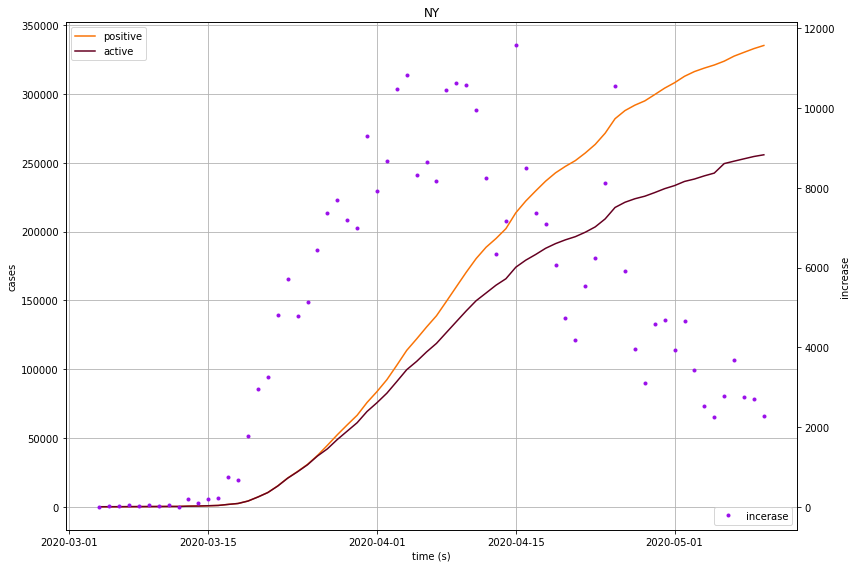

In [15]:
state = input()
visualization(state)

### Fetch ngram labels from data


In [ ]:
!pip install pytrends
!pip install --upgrade --user git+https://github.com/GeneralMills/pytrends
!pip install nltk
!pip install textblob
!pip install tqdm

  Created wheel for pytrends: filename=pytrends-4.7.2-cp36-none-any.whl size=14261 sha256=220ff74b362404df9eded0e1ce098fe6626d293730572ca0871493b972fdd8a0
  Stored in directory: /root/.cache/pip/wheels/64/ae/af/51d48fbbca0563036c6f80999b7ce3f097fa591fd165047baf
Successfully built pytrends
  Cloning https://github.com/GeneralMills/pytrends to /tmp/pip-req-build-m6v36ev_
  Running command git clone -q https://github.com/GeneralMills/pytrends /tmp/pip-req-build-m6v36ev_
  Created wheel for pytrends: filename=pytrends-4.7.2-cp36-none-any.whl size=14948 sha256=e0e29d7f486d7a336ec1a392245fe2ad43230e2ed0930709bee9c47e3abae25a
  Stored in directory: /tmp/pip-ephem-wheel-cache-0oh0jyii/wheels/f6/49/f7/a4785ff2079f1cc793186a60d40863c5d4ee9863e2b315a0bd
Successfully built pytrends


In [ ]:
import os
import numpy as np
import pandas as pd
import json
import nltk
import time
from tqdm import tqdm
from textblob import TextBlob
from pytrends.request import TrendReq

In [ ]:
# TERM_PATH = "./frequent_terms.csv"
# BIGRAM_PATH = "./frequent_bigrams.csv"
# TRIGRAM_PATH = "./frequent_trigrams.csv"
TERM_PATH = "/content/drive/My Drive/ML final proj/frequent_terms.csv"
BIGRAM_PATH = "/content/drive/My Drive/ML final proj/frequent_bigrams.csv"
TRIGRAM_PATH = "/content/drive/My Drive/ML final proj/frequent_trigrams.csv"

In [ ]:
num_features = 50

terms_data = pd.read_csv(TERM_PATH)
terms = list(terms_data['term'])
counts = list(terms_data['counts'])
result1 = pd.DataFrame(np.array([terms, counts]).T, columns=['keyword', 'count'])[:num_features]

bigram_data = pd.read_csv(BIGRAM_PATH)
bigrams = list(bigram_data['gram'])
counts = list(bigram_data['counts'])
result2 = pd.DataFrame(np.array([bigrams, counts]).T, columns=['keyword', 'count'])[:num_features]

trigram_data = pd.read_csv(TRIGRAM_PATH)
trigrams = list(trigram_data['gram'])
counts = list(trigram_data['counts'])
result3 = pd.DataFrame(np.array([trigrams, counts]).T, columns=['keyword', 'count'])[:num_features]

keywords = pd.concat([result1, result2, result3], ignore_index=True)
# keywords = pd.concat([result2, result3], ignore_index=True)

In [ ]:
keywords

,keyword,count
0,coronavirus,28120854
1,covid19,8630451
2,covid,8171888
3,19,7903151
4,nan,3888201
...,...,...
145,penyebaran covid 19,36072
146,covid 19 testing,35640
147,deliver copy officials,35454
148,copy officials last,35452


In [ ]:
ptr = TrendReq(hl='en-US', tz=300, retries=3, backoff_factor=10) # tz: time-zone offset, 300 for EST

In [ ]:
kw_list = list(keywords["keyword"])[0]
ptr.build_payload([kw_list], cat=0, timeframe='2020-01-21 2020-05-1', geo='', gprop='')
result = ptr.interest_over_time().drop(columns=['isPartial'])

In [ ]:
t = tqdm(list(keywords["keyword"])[1:])
for kw in t:
    t.set_description(desc="Fetching...")
    del(ptr)
    time.sleep(0.5)
    ptr = TrendReq(hl='en-US', tz=300, retries=3, backoff_factor=10) # tz: time-zone offset, 300 for EST
    ptr.build_payload([kw], cat=0, timeframe='2020-01-21 2020-05-1', geo='', gprop='')
    try:
        result = pd.concat([result, ptr.interest_over_time().drop(columns='isPartial')], axis=1)
    except KeyError:
        result = pd.concat([result, ptr.interest_over_time()], axis=1)

In [ ]:
result

In [ ]:
result.to_csv("./ngrams_by_date_90.csv")

### Training & Validation Data

In [ ]:
import pandas as pd
import numpy as np
import scipy
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
import matplotlib.pyplot as plt

In [89]:
ngram_n = pd.read_csv("/content/drive/My Drive/ML final proj/ngrams_by_date_30.csv")
ngram_n.head(5)

,date,coronavirus,covid19,covid,19,nan,people,via,china,amp,trump,covid 19,coronavirus outbreak,coronavirus covid19,coronavirus pandemic,coronavirus cases,covid19 coronavirus,via youtube,due coronavirus,novel coronavirus,new york,covid 19 pandemic,coronavirus covid 19,covid 19 cases,covid 19 crisis,coronavirus death toll,due covid 19,bbc news coronavirus
0,2020-01-21,2,0,0,9,84,55,98,39,98,30,0,8,0,0,0,0,53,0,19,63,0,0,0,0,0,0,1
1,2020-01-22,4,0,0,8,86,56,91,45,93,32,0,13,0,1,0,0,53,0,30,64,0,0,0,0,0,0,1
2,2020-01-23,5,0,0,8,82,58,89,53,98,30,0,25,0,2,0,0,36,0,38,62,0,0,0,0,2,0,4
3,2020-01-24,8,0,0,9,75,57,86,62,88,31,0,26,0,3,1,0,41,0,43,63,0,0,0,0,5,0,4
4,2020-01-25,10,0,0,8,83,51,67,67,87,29,0,30,0,4,1,0,41,1,46,60,0,0,0,0,10,0,4


In [90]:
df_matrix = ngram_n.drop(['date'], axis=1,inplace=False).to_numpy()
print(df_matrix)

[[ 2  0  0 ...  0  0  1]
 [ 4  0  0 ...  0  0  1]
 [ 5  0  0 ...  2  0  4]
 ...
 [27 41 70 ... 41 39 26]
 [25 39 68 ... 35 39 22]
 [26 38 67 ... 37 37 23]]


In [ ]:
###
avg_date = 7

In [ ]:
def avg_data_sample(dataFrame, avg_date=7):
    df_matrix = dataFrame.drop(['date'], axis=1,inplace=False).to_numpy()

    d_avg = np.zeros((df_matrix.shape[0]-avg_date,df_matrix.shape[1]))
    for i in range(len(d_avg)):
        d_avg[i] = np.mean(df_matrix[i:i+avg_date],axis=0)
    return d_avg

In [192]:
df_matrix = avg_data_sample(ngram_n, avg_date=avg_date)
print(df_matrix)

[[ 7.14285714  0.          0.         ...  6.71428571  0.
   3.42857143]
 [ 8.85714286  0.          0.         ...  9.57142857  0.
   4.28571429]
 [10.14285714  0.          0.         ... 13.14285714  0.
   5.14285714]
 ...
 [34.14285714 43.28571429 69.14285714 ... 41.57142857 40.
  25.85714286]
 [33.42857143 42.28571429 68.71428571 ... 41.42857143 38.85714286
  26.        ]
 [31.28571429 41.42857143 68.42857143 ... 40.71428571 38.42857143
  25.57142857]]


In [193]:
cases_data = pd.read_csv('USA.csv')
cases_data.head(10)

,Unnamed: 0,date,positive,recovered,death,positiveIncrease,active
0,0,20200510,1322807,216169.0,74270.0,21712.0,1032368.0
1,1,20200509,1301095,212534.0,73291.0,25179.0,1015270.0
2,2,20200508,1275916,198993.0,71762.0,27779.0,1005161.0
3,3,20200507,1248137,195036.0,70002.0,27580.0,983099.0
4,4,20200506,1220557,189910.0,67256.0,24952.0,963391.0
5,5,20200505,1195605,189791.0,65307.0,22152.0,940507.0
6,6,20200504,1173453,187180.0,62780.0,21447.0,923493.0
7,7,20200503,1152006,180152.0,61868.0,26287.0,909986.0
8,8,20200502,1125719,175382.0,60710.0,30038.0,889627.0
9,9,20200501,1095681,164015.0,59059.0,33178.0,872607.0


In [ ]:
def avg_target_labels(dataFrame, tag=None, avg_date=7, delay_date=7):
    if tag is None:
        tag = 'positiveIncrease'
    positive = dataFrame[tag]

    d_avg_rev = np.zeros((positive.shape[0]-avg_date))
    for i in range(len(d_avg_rev)):
        d_avg_rev[i] = np.mean(positive[i:i+avg_date])

    d_avg = np.flipud(d_avg_rev)[1:]
    # Delay by date
    d_avg = d_avg[delay_date:]
    return d_avg

In [ ]:
# labels
d_avg = avg_target_labels(dataFrame=cases_data, avg_date=avg_date)

In [230]:
# z-score Standrization
train_matrix = scipy.stats.zscore(df_matrix, axis=1)

# train test data split (test data is the latest data theoretically)
X_train, X_test, y_train, y_test = train_test_split(train_matrix[train_matrix.shape[0]-d_avg.shape[0]:], 
                                                    d_avg, test_size=0.15, shuffle=False) 

# Lasso feature selection
EN_reg = ElasticNet(alpha=1,l1_ratio=1.0,max_iter=15000)
EN_reg.fit(X_train,y_train)

pred_ELN = EN_reg.predict(X_test)
diff = y_test-pred_ELN
print(diff)
print(EN_reg.score(X_test,y_test))
print(EN_reg.coef_)

[  549.4949056  -1261.00798541  -983.12210303 -1301.15841618
 -1321.89381987 -1967.05623558 -1758.85625521 -1100.17478332
   207.38968552   195.49411393   320.49758551  -341.2399415
 -1104.22491736 -2413.91630836 -3907.49470589]
-0.08008458537721186
[ -1954.76889667 -14282.13375294  12848.24990323      0.
    415.51591675    448.00570822  -2447.44401613   -154.22068803
  -1723.82927669   -211.46183129  10668.79541044    634.73267913
  -1660.50964602     -0.           5133.88851228      0.
      0.          -1424.5521275    -545.87988841    775.03056159
      0.            554.07107313  -2462.8986062   -4644.1182806
    196.11624136      0.              0.        ]


In [233]:
# MLP Neural Network model
MLP_regressor = MLPRegressor(hidden_layer_sizes=(500),alpha=0.3,learning_rate_init=1,max_iter=2000,learning_rate='invscaling').fit(X_train, y_train)
MLP_regressor.fit(X_train,y_train)

pred_MLP = MLP_regressor.predict(X_test)
diff = y_test-pred_MLP
print(diff)
print(MLP_regressor.score(X_test,y_test))

[  517.28573487  -612.29482681  -450.39033391  -706.15175093
  -686.15531703 -1116.56292657 -1356.90459597  -880.22283008
  -278.03322052  -240.42226635   256.96949603   297.7406155
   265.66221689  -258.40130822  -483.11754258]
0.8154200141230561


Text(0.5, 1.0, 'new increase pred in 4/19-5/2')

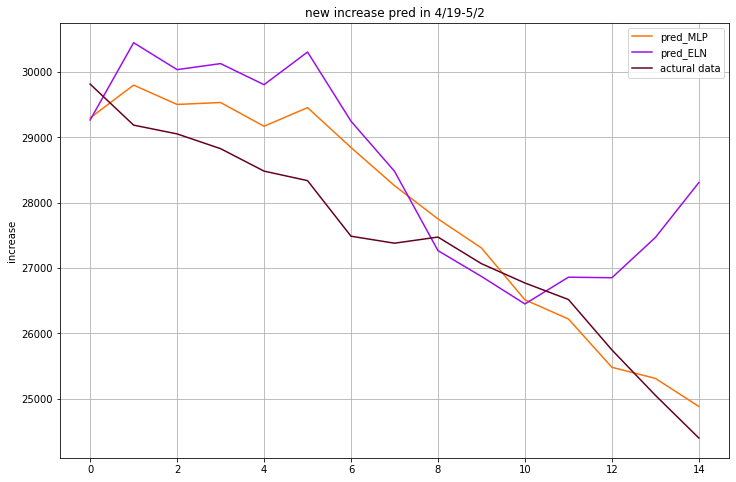

In [235]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot()
ax1.plot(pred_MLP, 'xkcd:orange')
ax1.plot(pred_ELN, 'xkcd:violet')
ax1.plot(y_test, 'xkcd:maroon')
ax1.set_ylabel('increase')
ax1.legend(['pred_MLP','pred_ELN','actural data'])
ax1.grid(True)
ax1.set_title('new increase pred in 4/19-5/2')